In [94]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime

import statsmodels.tsa.api as smt



In [95]:
original_df = pd.read_csv('data/train.csv') 

df = original_df.copy()
df.info()

df.date = df.date.apply(lambda x: str(x)[:-3])
df = df.groupby('date')['sales'].sum().reset_index()
df.date = pd.to_datetime(df.date)

df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382


1825 days
5.0 years


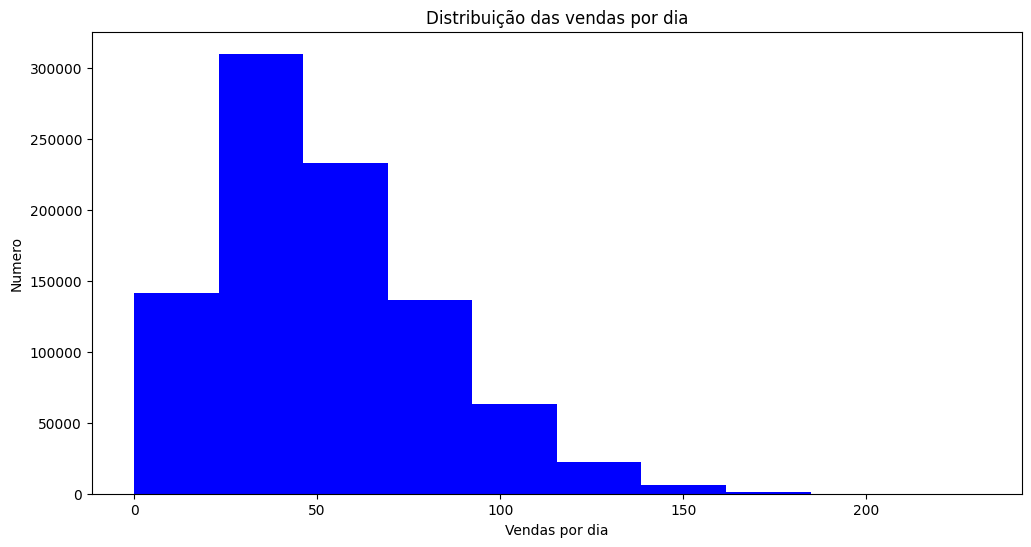

In [96]:
original_df.date = pd.to_datetime(original_df.date)
number_of_days = original_df.date.max() - original_df.date.min()
number_of_years = number_of_days.days / 365
print(number_of_days.days, 'days')
print(number_of_years, 'years')

fig, ax = plt.subplots(figsize=(12,6))
plt.hist(original_df.sales, color='blue')

ax.set(xlabel = "Vendas por dia",
        ylabel = "Numero",
        title = "Distribuição das vendas por dia")

plt.savefig('images/histograma_distribuicao_vendas.png', format='png')

c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Overall average monthly sales: $795075.2
Last 12 months average monthly sales: $894478.3333333334


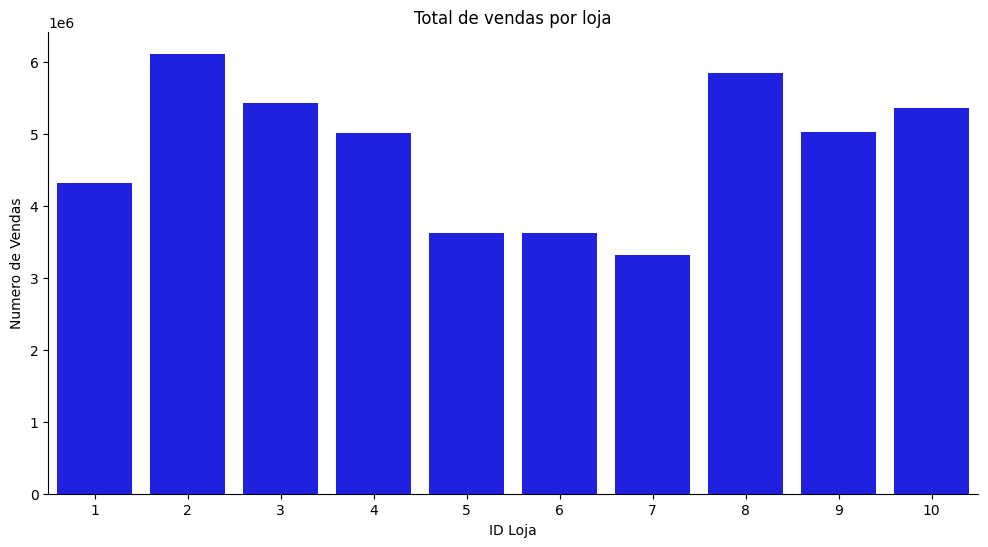

In [97]:
original_df
by_store = original_df.groupby('store')['sales'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=by_store.store, y=by_store.sales, color='blue')

ax.set(xlabel = "ID Loja",
        ylabel = "Numero de Vendas",
        title = "Total de vendas por loja")

sns.despine()

plt.savefig('images/total_de_vendas_por_loja.png', format='png')

# Average monthly sales

# Overall
avg_monthly_sales = df.sales.mean()
print(f"Overall average monthly sales: ${avg_monthly_sales}")

# Last 12 months (this will be the forecasted sales)
avg_monthly_sales_12month = df.sales[-12:].mean()
print(f"Last 12 months average monthly sales: ${avg_monthly_sales_12month}")

c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: Futur

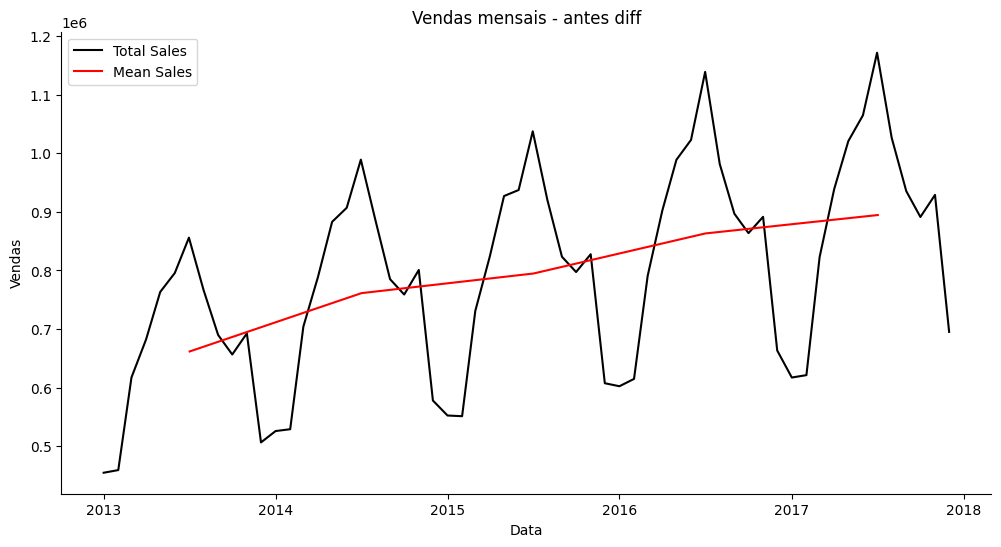

In [98]:
x_col = 'date'
y_col = 'sales'
data = df
title = 'Vendas mensais - antes diff'

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=x_col, y=y_col, data=df, ax=ax, color='black', label='Total Sales')

second = df.groupby(df.date.dt.year)[y_col].mean().reset_index()
second.date = pd.to_datetime(second.date, format='%Y')
sns.lineplot(x=(second.date + datetime.timedelta(6*365/12)), y=y_col, data=second, ax=ax, color='red', label='Mean Sales')   

ax.set(xlabel = "Data",
        ylabel = "Vendas",
        title = title)

sns.despine()

plt.savefig('images/vendas_mensais_antes_diff.png', format='png')

In [99]:
df['sales_diff'] = df.sales.diff()
df = df.dropna()

df.to_csv('data/processed/stationary_df.csv')

c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\klaud\OneDrive\Documentos\sales-forecasting-v2\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: Futur

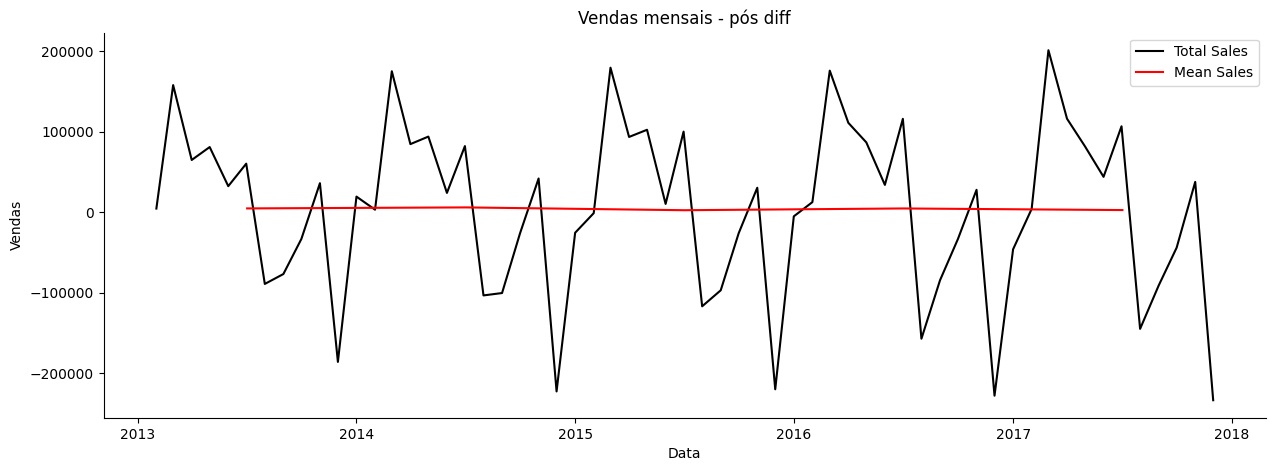

In [100]:
x_col = 'date'
y_col = 'sales_diff'
data = df
title = 'Vendas mensais - pós diff'

fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x=x_col, y=y_col, data=data, ax=ax, color='black', label='Total Sales')

second = data.groupby(data.date.dt.year)[y_col].mean().reset_index()
second.date = pd.to_datetime(second.date, format='%Y')
sns.lineplot(x=(second.date + datetime.timedelta(6*365/12)), y=y_col, data=second, ax=ax, color='red', label='Mean Sales')   

ax.set(xlabel = "Data",
        ylabel = "Vendas",
        title = title)

sns.despine()

plt.savefig('images/vendas_mensais_pos_diff.png', format='png')

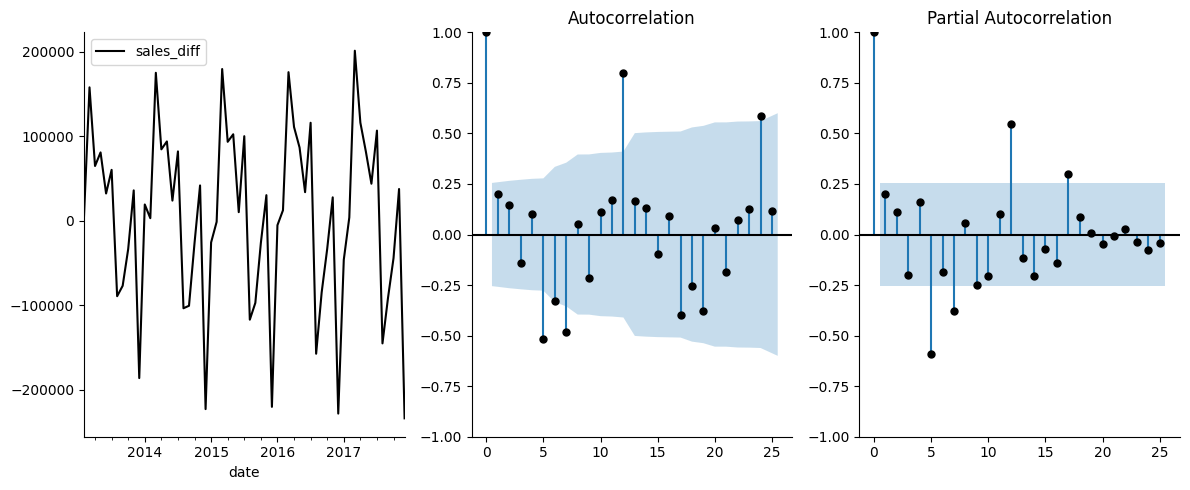

In [101]:
# Convert dataframe to datetime index
dt_data = data.set_index('date').drop('sales', axis=1)
dt_data.dropna(axis=0)

layout = (1, 3)
raw  = plt.subplot2grid(layout, (0, 0))
acf  = plt.subplot2grid(layout, (0, 1))
pacf = plt.subplot2grid(layout, (0, 2))

dt_data.plot(ax=raw, figsize=(12, 5), color='black')
smt.graphics.plot_acf(dt_data, lags=25, ax=acf, color='black')
smt.graphics.plot_pacf(dt_data, lags=25, ax=pacf, color='black')
sns.despine()
plt.tight_layout()

plt.savefig('images/acf_pacf.png', format='png')

In [102]:
dt_data = data.set_index('date').drop('sales', axis=1)
dt_data.dropna(axis=0)

dt_data.to_csv('data/processed/arima_df.csv')